In [1]:
%env CUDA_LAUNCH_BLOCKING=1
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")


env: CUDA_LAUNCH_BLOCKING=1


In [2]:
from robotodo.engines.isaac._kernel import Kernel

kernel = Kernel([
    "--/log/file=/tmp/todo-isaacsim.log",
    # "--/log/enableStandardStreamOutput=true",
    "--/app/enableStdoutOutput=true",
    # "--no-window",
], kit_path="isaacsim.exp.full.kit")
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'
[0.061s] [ext: omni.kit.async_engine-0.0.3] startup
[0.244s] [ext: omni.metrics.core-0.0.3] startup
[0.245s] [ext: omni.client.lib-1.1.0] startup
[0.261s] [ext: omni.blobkey-1.1.2] startup
[0.261s] [ext: omni.stats-1.0.1] startup
[0.262s] [ext: omni.datastore-0.0.0] startup
[0.267s] [ext: omni.client-1.3.0] startup
[0.322s] [ext: omni.ujitso.default-1.0.0] startup
[0.324s] [ext: omni.hsscclient-1.1.2] startup
[0.328s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.329s] [ext: omni.assets.plugins-0.0.0] startup
[0.331s] [ext: omni.gpu_foundation-0.0.0] startup
[0.343s] [ext: carb.windowing.plugin

[12.592s] [ext: isaacsim.ros2.bridge-4.9.3] startup
[12.646s] Using backup internal ROS2 humble distro
Checking to see if RMW can be loaded:
failed to get symbol 'rmw_init_options_init' due to Environment variable 'AMENT_PREFIX_PATH' is not set or empty, at /workspace/humble_ws/src/rmw_implementation/src/functions.cpp:171, at /workspace/humble_ws/src/rcl/rcl/src/rcl/init_options.c:75
RMW was not loaded

[12.664s] To use the internal libraries included with the extension please set the following environment variables to use with FastDDS (default) or CycloneDDS before starting Isaac Sim:

FastDDS (default):
export ROS_DISTRO=humble
export RMW_IMPLEMENTATION=rmw_fastrtps_cpp
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/isaacsim/exts/isaacsim.ros2.bridge/humble/lib

OR

CycloneDDS:
export ROS_DISTRO=humble
export RMW_IMPLEMENTATION=rmw_cyclonedds_cpp
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/sysadmin/lab/robotodo/.conda/lib/pyt

2025-10-11T11:30:18Z [12,645ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


In [3]:
# # TODO
# import omni
# # TODO 
# kernel.get_settings().set("/app/player/playSimulations", False)
# timeline = omni.timeline.acquire_timeline_interface()
# timeline.play()
# timeline.stop()
# kernel.get_settings().set("/app/player/playSimulations", True)

[12.763s] [ext: isaacsim.ros2.bridge-4.9.3] shutdown


In [4]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

2025-10-11T11:30:19Z [14,127ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-11T11:30:19Z [14,127ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-11T11:30:19Z [14,223ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


[14.149s] app ready


In [5]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


# TODO this requires the stage to be editable!!!!
panda = await load_urdf(
    "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
    scene=scene, 
    fix_root_link=True,
)


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])

cam = await build_camera(scene=scene)
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=panda.link_poses[..., -1].p)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

2025-10-11T11:30:21Z [15,754ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x7f6ea4002f50:World1_sensor.usd'

2025-10-11T11:30:21Z [15,754ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x7f6ea4002f50:World1_sensor.usd for write

2025-10-11T11:30:21Z [15,755ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x7f6ea4002f50:World1_physics.usd'

2025-10-11T11:30:21Z [15,756ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x7f6ea4002f50:World1_physics

In [32]:
mug.pose = Pose(p=[.5, .5, .5])


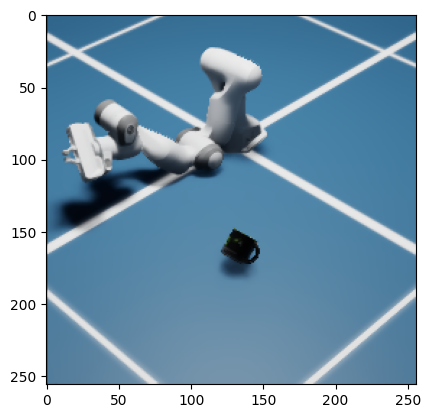

In [34]:

import matplotlib.pyplot as plt

cam.pose = Pose.from_lookat([2, 2, 2], p_target=mug.pose.p)
plt.imshow(cam.read_rgba()[0].cpu())

In [43]:
await scene.step()

In [7]:
import omni

timeline = omni.timeline.acquire_timeline_interface()
timeline.set_auto_update(False)

In [10]:
timeline.stop()
timeline.is_stopped()

False

In [48]:
timeline.pause()

In [8]:
timeline.play()
timeline.is_playing(), timeline.is_auto_updating()

(False, False)

2025-10-11T11:04:52Z [34,433ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [63]:
timeline.is_auto_updating()

True

In [30]:
timeline.forward_one_frame?

Docstring:
forward_one_frame(self: omni.timeline._timeline.ITimeline) -> None


Forwards the timeline by one frame.
Type:      method

In [67]:
timeline.play()
timeline.is_playing(), timeline.is_auto_updating()


(False, True)

In [42]:
# timeline.pause()
timeline.stop()

In [17]:
timeline.forward_one_frame()

2025-10-11T09:50:48Z [531,246ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [38]:
timeline.is_auto_updating()

True

In [27]:
# timeline.set_auto_update(False)
timeline.set_auto_update(True)

In [29]:
timeline.forward_one_frame()

In [69]:
await scene.step()

In [35]:
omni.replicator.core.AnnotatorRegistry?

Init signature: omni.replicator.core.AnnotatorRegistry()
Docstring:      Registry of annotators providing groundtruth data to writers.
File:           ~/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/exts/3/omni.replicator.core-1.12.17+107.3.1.lx64.r.cp311/omni/replicator/core/scripts/annotators.py
Type:           type
Subclasses:     

In [15]:
# TODO
import omni
omni.replicator.core.orchestrator.preview()

In [14]:
omni.replicator.core.orchestrator.get_status()

<Status.STOPPED: 0>

In [ ]:
omni.replicator.core.orchestrator.set_capture_on_play

In [38]:
omni.replicator.core.orchestrator.run()

In [ ]:
kernel.get_settings().get("/app/player/playSimulations")


True

In [8]:
import omni

# TODO 
kernel.get_settings().set("/app/player/playSimulations", False)
timeline = omni.timeline.acquire_timeline_interface()
timeline.play()
timeline.stop()
kernel.get_settings().set("/app/player/playSimulations", True)


2025-10-11T11:13:03Z [30,964ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.
